In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
#reading the dataset
data= pd.read_csv('insurance.csv')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [21]:
data.shape

(1338, 7)

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.isnull().sum() #no null values

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## Exploratory Data Analysis

Univarient Analysis

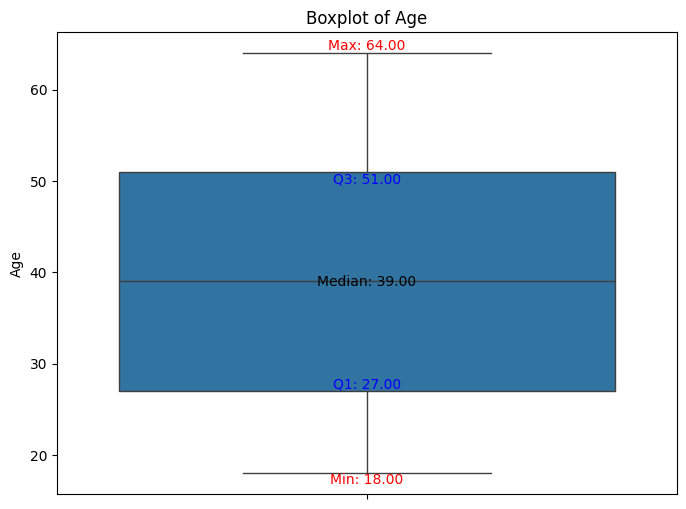

In [22]:
# Age Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')

# Calculate statistics for annotation
age_stats = data['age'].describe()
min_age = age_stats['min']
q1_age = age_stats['25%']
median_age = age_stats['50%']
q3_age = age_stats['75%']
max_age = age_stats['max']

# Add annotations
plt.text(0, min_age, f'Min: {min_age:.2f}', ha='center', va='top', color='red')
plt.text(0, q1_age, f'Q1: {q1_age:.2f}', ha='center', va='bottom', color='blue')
plt.text(0, median_age, f'Median: {median_age:.2f}', ha='center', va='center', color='black')
plt.text(0, q3_age, f'Q3: {q3_age:.2f}', ha='center', va='top', color='blue')
plt.text(0, max_age, f'Max: {max_age:.2f}', ha='center', va='bottom', color='red')

plt.show()


1. The Age of the insured approximately follow a uniform distribution with Mean of 39.2 and Median of 39.0, and with lowest age being 18 and highest being 64.
2. There are no outlier values in the Age distribution in the data.

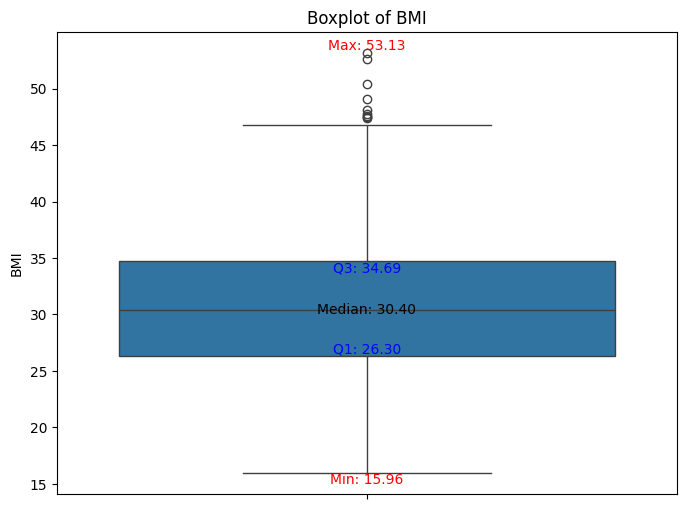

In [23]:
# BMI Boxplot

plt.figure(figsize=(8, 6))
sns.boxplot(y=data['bmi'])
plt.title('Boxplot of BMI')
plt.ylabel('BMI')

# Calculate statistics for annotation
bmi_stats = data['bmi'].describe()
min_bmi = bmi_stats['min']
q1_bmi = bmi_stats['25%']
median_bmi = bmi_stats['50%']
q3_bmi = bmi_stats['75%']
max_bmi = bmi_stats['max']

# Add annotations
plt.text(0, min_bmi, f'Min: {min_bmi:.2f}', ha='center', va='top', color='red')
plt.text(0, q1_bmi, f'Q1: {q1_bmi:.2f}', ha='center', va='bottom', color='blue')
plt.text(0, median_bmi, f'Median: {median_bmi:.2f}', ha='center', va='center', color='black')
plt.text(0, q3_bmi, f'Q3: {q3_bmi:.2f}', ha='center', va='top', color='blue')
plt.text(0, max_bmi, f'Max: {max_bmi:.2f}', ha='center', va='bottom', color='red')

plt.show()

In [24]:
# no.of outliers in bmi column
# Calculating the (IQR) for BMI
Q1_bmi = data['bmi'].quantile(0.25)
Q3_bmi = data['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

# Define the lower and upper bounds for outlier detection
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

# Identify outliers in the 'bmi' column
outliers_bmi = data[(data['bmi'] < lower_bound_bmi) | (data['bmi'] > upper_bound_bmi)]

# Print the number of outliers
print(f"Number of outliers in the 'bmi' column: {len(outliers_bmi)}")

Number of outliers in the 'bmi' column: 9


1. The BMI distribution of the Insured approximately follows a normal distribution with a Mean of 30.66 and Median of 30.4.
2. There are a total of 9 outlier values in the BMI distribution

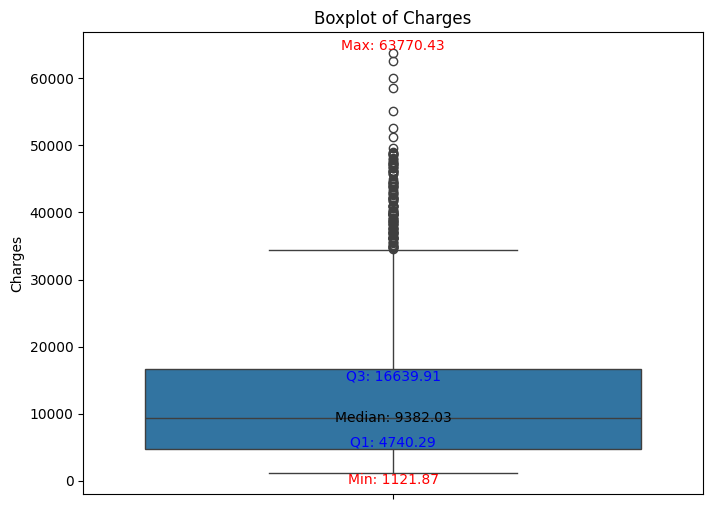

Number of outliers in the 'charges' column: 139


In [25]:
# boxplot of charges

import matplotlib.pyplot as plt
# Charges Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['charges'])
plt.title('Boxplot of Charges')
plt.ylabel('Charges')

# Calculate statistics for annotation
charges_stats = data['charges'].describe()
min_charges = charges_stats['min']
q1_charges = charges_stats['25%']
median_charges = charges_stats['50%']
q3_charges = charges_stats['75%']
max_charges = charges_stats['max']

# Add annotations
plt.text(0, min_charges, f'Min: {min_charges:.2f}', ha='center', va='top', color='red')
plt.text(0, q1_charges, f'Q1: {q1_charges:.2f}', ha='center', va='bottom', color='blue')
plt.text(0, median_charges, f'Median: {median_charges:.2f}', ha='center', va='center', color='black')
plt.text(0, q3_charges, f'Q3: {q3_charges:.2f}', ha='center', va='top', color='blue')
plt.text(0, max_charges, f'Max: {max_charges:.2f}', ha='center', va='bottom', color='red')

plt.show()

# no.of outliers in charges column
# Calculating the (IQR) for Charges
Q1_charges = data['charges'].quantile(0.25)
Q3_charges = data['charges'].quantile(0.75)
IQR_charges = Q3_charges - Q1_charges

# Define the lower and upper bounds for outlier detection
lower_bound_charges = Q1_charges - 1.5 * IQR_charges
upper_bound_charges = Q3_charges + 1.5 * IQR_charges

# Identify outliers in the 'charges' column
outliers_charges = data[(data['charges'] < lower_bound_charges) | (data['charges'] > upper_bound_charges)]

# Print the number of outliers
print(f"Number of outliers in the 'charges' column: {len(outliers_charges)}")

1. The Charges distribution of the Insured is heavily skewed to the left (median < mean) with a Mean of 13270.4223 and Median of 9382.033.
2. Out of a total of 1338 data points, there are a total of 139 outlier values in the distribution of charges, all in the higher side.

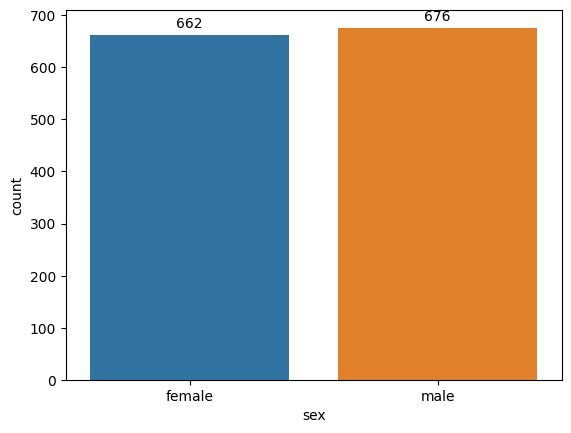

In [30]:
ax = sns.countplot(x = 'sex', data = data , hue = 'sex')
for container in ax.containers:
    ax.bar_label(container, padding=3)
plt.show()

1. The dataset is almost evenly distributed among genders, with 676 Males (50.5%) and 662 Females (49.5%).

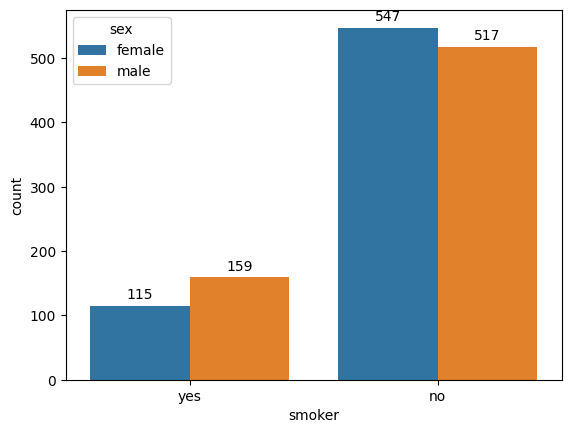

In [29]:
ax = sns.countplot(x = 'smoker', hue = 'sex', data = data)
for container in ax.containers:
    ax.bar_label(container, padding=3)
plt.show()

In [31]:
# Are average premium charges for smokers significantly higher than non-smokers?
data['charges'].groupby(data['smoker']).mean()

,charges
smoker,
no,8434.268298
yes,32050.231832


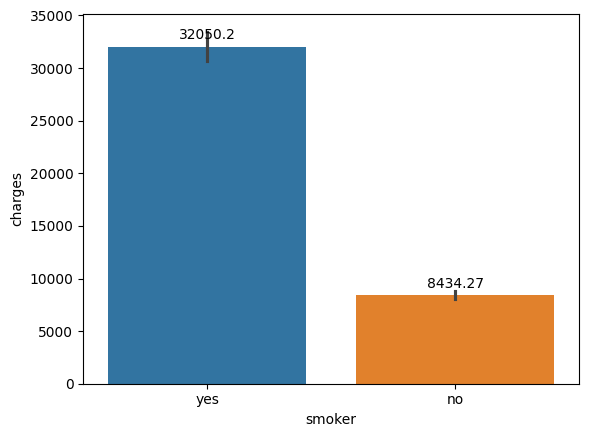

In [33]:
ax = sns.barplot(x = "smoker", y = "charges", data = data, hue = 'smoker')
for container in ax.containers:
    ax.bar_label(container, padding=3)
plt.show()

The Average premium charges for smokers significantly higher than non-smokers

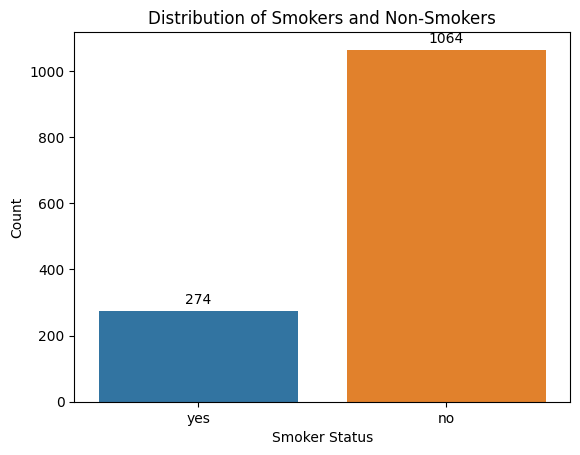

In [39]:
#bar plot showing no.of smoker and non smoker

ax = sns.countplot(x='smoker', data=data, hue='smoker')
for container in ax.containers:
    ax.bar_label(container, padding=3)
plt.title('Distribution of Smokers and Non-Smokers')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.show()

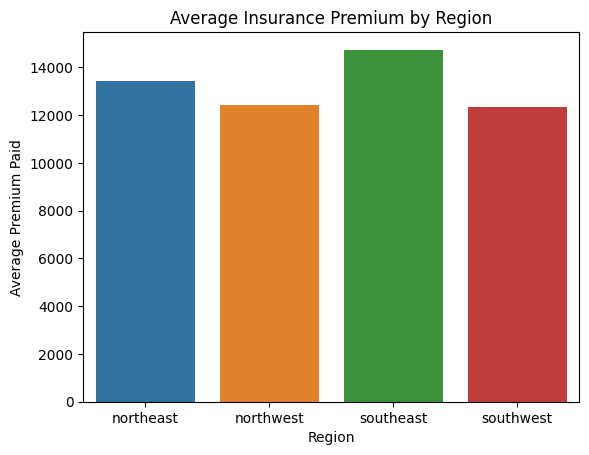

In [35]:
# Average insurance premium paid in different regions
avg_premiums = data.groupby('region')['charges'].mean().reset_index()
sns.barplot(x = 'region', y = 'charges', data = avg_premiums, hue = 'region')
plt.title('Average Insurance Premium by Region')
plt.xlabel('Region')
plt.ylabel('Average Premium Paid')
plt.show()


## Hypothesis Testing

1. Do charges of people who smoke differ significantly from the people who don't?

Null Hypothesis - Mean Charge of all smokers in our data = Mean Charge of all non - smokers in our data
Alternate Hypothesis - Mean Charge of all smokers in our data != Mean Charge of all non - smokers in our data

Significance α = 0.05

In [37]:
smokers = data[data['smoker'] == 'yes']
nonsmokers = data[data['smoker'] == 'no']
charge_smokers = smokers['charges']
charge_nonsmokers = nonsmokers['charges']

print(f'Number of smokers: {smokers.shape[0]}')
print(f'Variance in charges of smokers: {np.var(charge_smokers)}')
print(f'Number of non - smokers: {nonsmokers.shape[0]}')
print(f'Variance in charges of non - smokers: {np.var(charge_nonsmokers)}')

Number of smokers: 274
Variance in charges of smokers: 132721153.13625304
Number of non - smokers: 1064
Variance in charges of non - smokers: 35891656.00316425


In [40]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(charge_smokers, charge_nonsmokers, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

t_statistic: 32.751887766341824
p_value: 5.88946444671698e-103


1. Reject the Null Hypothesis and state that At 5% significance level, the mean charges of smokers and non - smokers are not equal.
2. Hence, charges of people who smoke indeed differ significantly from the people who don't.

2. Is the proportion of smokers significantly different in different genders?
Null Hypothesis: proportion of male smokers = proportion of female smoker
Alternate Hypothesis: proportion of male smokers != proportion of female smoker
Significance α = 0.05

In [44]:
n_females = data['sex'].value_counts()['female'] # number of females in the data
n_males = data['sex'].value_counts()['male'] # number of females in the data

female_smokers = data[data['sex'] == 'female'].smoker.value_counts()['yes'] # number of female smokers
male_smokers = data[data['sex'] == 'male'].smoker.value_counts()['yes'] # number of male smokers

print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,4)*100}%, {round(159/676,4)*100}% respectively.')

[np.int64(115), np.int64(159)] [np.int64(662), np.int64(676)]
 Proportion of smokers in females, males = 17.37%, 23.52% respectively.


In [45]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
print(f'Statistic: {stat}\np_value: {pval}')

Statistic: -2.7867402154855503
p_value: 0.005324114164320532


1. We Reject the Null Hypothesis and state that At 5% significance level, the porportion of smokers in insured males and females are equal.
2. Hence, proportion of smokers are significantly different in different genders.

## Predictive model

In [ ]:
df=data

In [ ]:
#Encoding- converting categorical variables into numeric using label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

In [ ]:
#creating correlation matrix
matrix=df.corr()
matrix

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


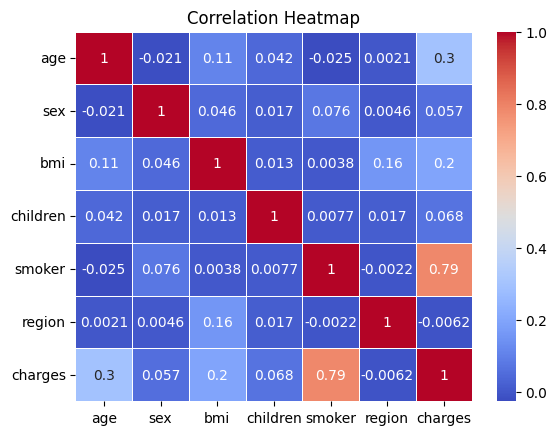

In [ ]:
#heatmap for correlation matrix
sns.heatmap(matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

From the correlation heatmap, we can conclude that the premium charges show a weak positive correlation with Age and BMI of the insured, and a strong positive correlation with smoking habit.

In [ ]:
df['bmi'].max()

53.13

In [ ]:
#Grouping bmi into bins

def group_bmi(bmi):
  if 15 <= bmi < 21:
    return '15-20'
  elif 21 <= bmi < 26:
    return '21-25'
  elif 26 <= bmi < 31:
    return '26-30'
  elif 31 <= bmi < 36:
    return '31-35'
  elif 36 <= bmi < 41:
    return '36-40'
  elif 41 <= bmi < 46:
    return '41-45'
  elif 46 <= bmi < 51:
    return '46-50'
  else:
    return '50+'


df['bmi_group'] = df['bmi'].apply(group_bmi)
df['bmi_group']

0       26-30
1       31-35
2       31-35
3       21-25
4       26-30
        ...  
1333    26-30
1334    31-35
1335    36-40
1336    21-25
1337    26-30
Name: bmi_group, Length: 1338, dtype: object

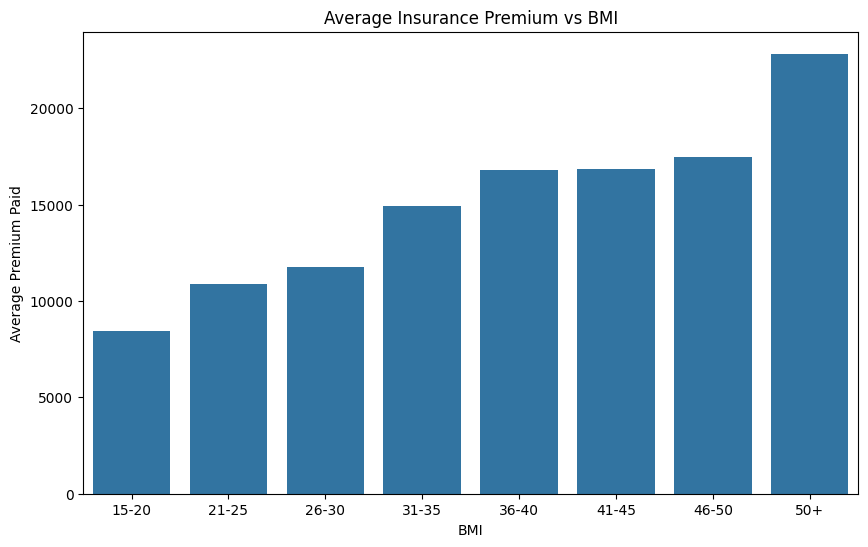

In [ ]:
#permium paid by different bmi groups
avg_premiums = df.groupby('bmi_group')['charges'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='bmi_group', y='charges', data=avg_premiums)
plt.title('Average Insurance Premium vs BMI')
plt.xlabel('BMI')
plt.ylabel('Average Premium Paid')

plt.show()

As the age increases the premium paid by the users is also going up

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,bmi_group
0,19,0,27.900,0,1,3,16884.92400,26-30
1,18,1,33.770,1,0,2,1725.55230,31-35
2,28,1,33.000,3,0,2,4449.46200,31-35
3,33,1,22.705,0,0,1,21984.47061,21-25
4,32,1,28.880,0,0,1,3866.85520,26-30
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,26-30
1334,18,0,31.920,0,0,0,2205.98080,31-35
1335,18,0,36.850,0,0,2,1629.83350,36-40
1336,21,0,25.800,0,0,3,2007.94500,21-25


In [ ]:
# splitting into dependent and independent variables
x= df.drop(['charges','bmi_group'],axis=1)
y=df['charges']

In [ ]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


    Feature  Importance
4    smoker    0.621780
2       bmi    0.210094
0       age    0.128810
3  children    0.019569
5    region    0.013840
1       sex    0.005907


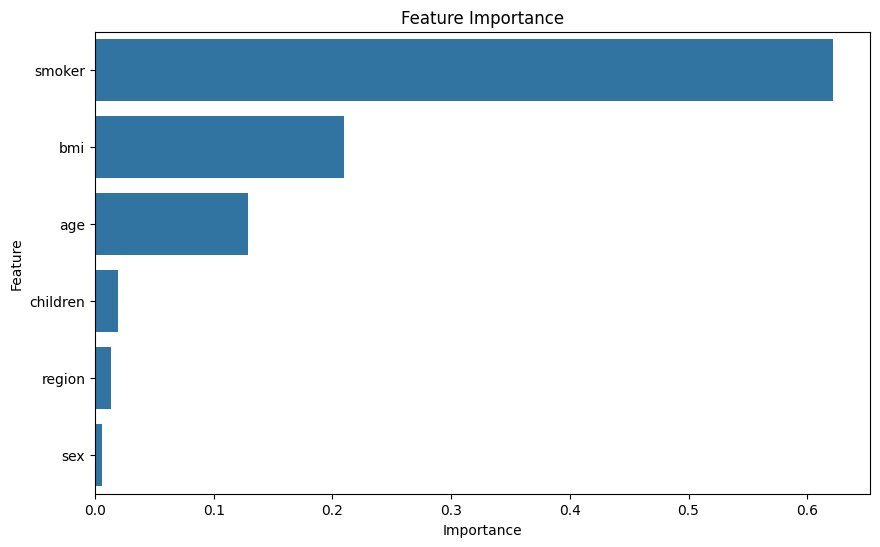

In [ ]:

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


# Create a Random Forest Regressor model
model = RandomForestRegressor()

# Fit the model to the data
model.fit(x, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print or visualize feature importances
print(feature_importances)

# Optionally, plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
#applying linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()


model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
#accuracy metric
from sklearn.metrics import r2_score, mean_absolute_error
print('R2 score for Linear regression:',r2_score(y_test, y_pred))
print('MAE for Linear regression:',mean_absolute_error(y_test, y_pred))

0.7833463107364539
4186.508898366433


In [ ]:
# coeeficient of the linear regression equation


coefficients = model.coef_

# Print the coefficients
print("Coefficients:", coefficients)


Coefficients: [ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]


In [ ]:
# linear regression equation with the actual variable names

# Get the intercept
intercept = model.intercept_

# Create the equation string
equation = "charges = {:.2f}".format(intercept)

# Add the terms for each feature
for i, coef in enumerate(coefficients):
    feature_name = x.columns[i]
    equation += " + {:.2f} * {}".format(coef, feature_name)

# Print the equation
print("Linear Regression Equation:")
print(equation)


Linear Regression Equation:
charges = -11946.61 + 257.06 * age + -18.79 * sex + 335.78 * bmi + 425.09 * children + 23647.82 * smoker + -271.28 * region


In [ ]:
#applying Ridge
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

y_pred_ridge = ridge.predict(x_test)

print("R2 score for Ridge Regression:", r2_score(y_test, y_pred_ridge))
print("MAE for Ridge Regression:", mean_absolute_error(y_test, y_pred_ridge))


R2 score for Ridge Regression: 0.7833217621706015
MAE for Ridge Regression: 4187.673855281296


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
model_d = DecisionTreeRegressor()
model_d.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_d = model_d.predict(x_test)
print("R2  for decision tree",r2_score(y_test, y_pred_d))
print("MAE value for decision tree",mean_absolute_error(y_test, y_pred_d))


R2  for decision tree 0.7263949967510172
MAE value for decision tree 3011.3033168880597


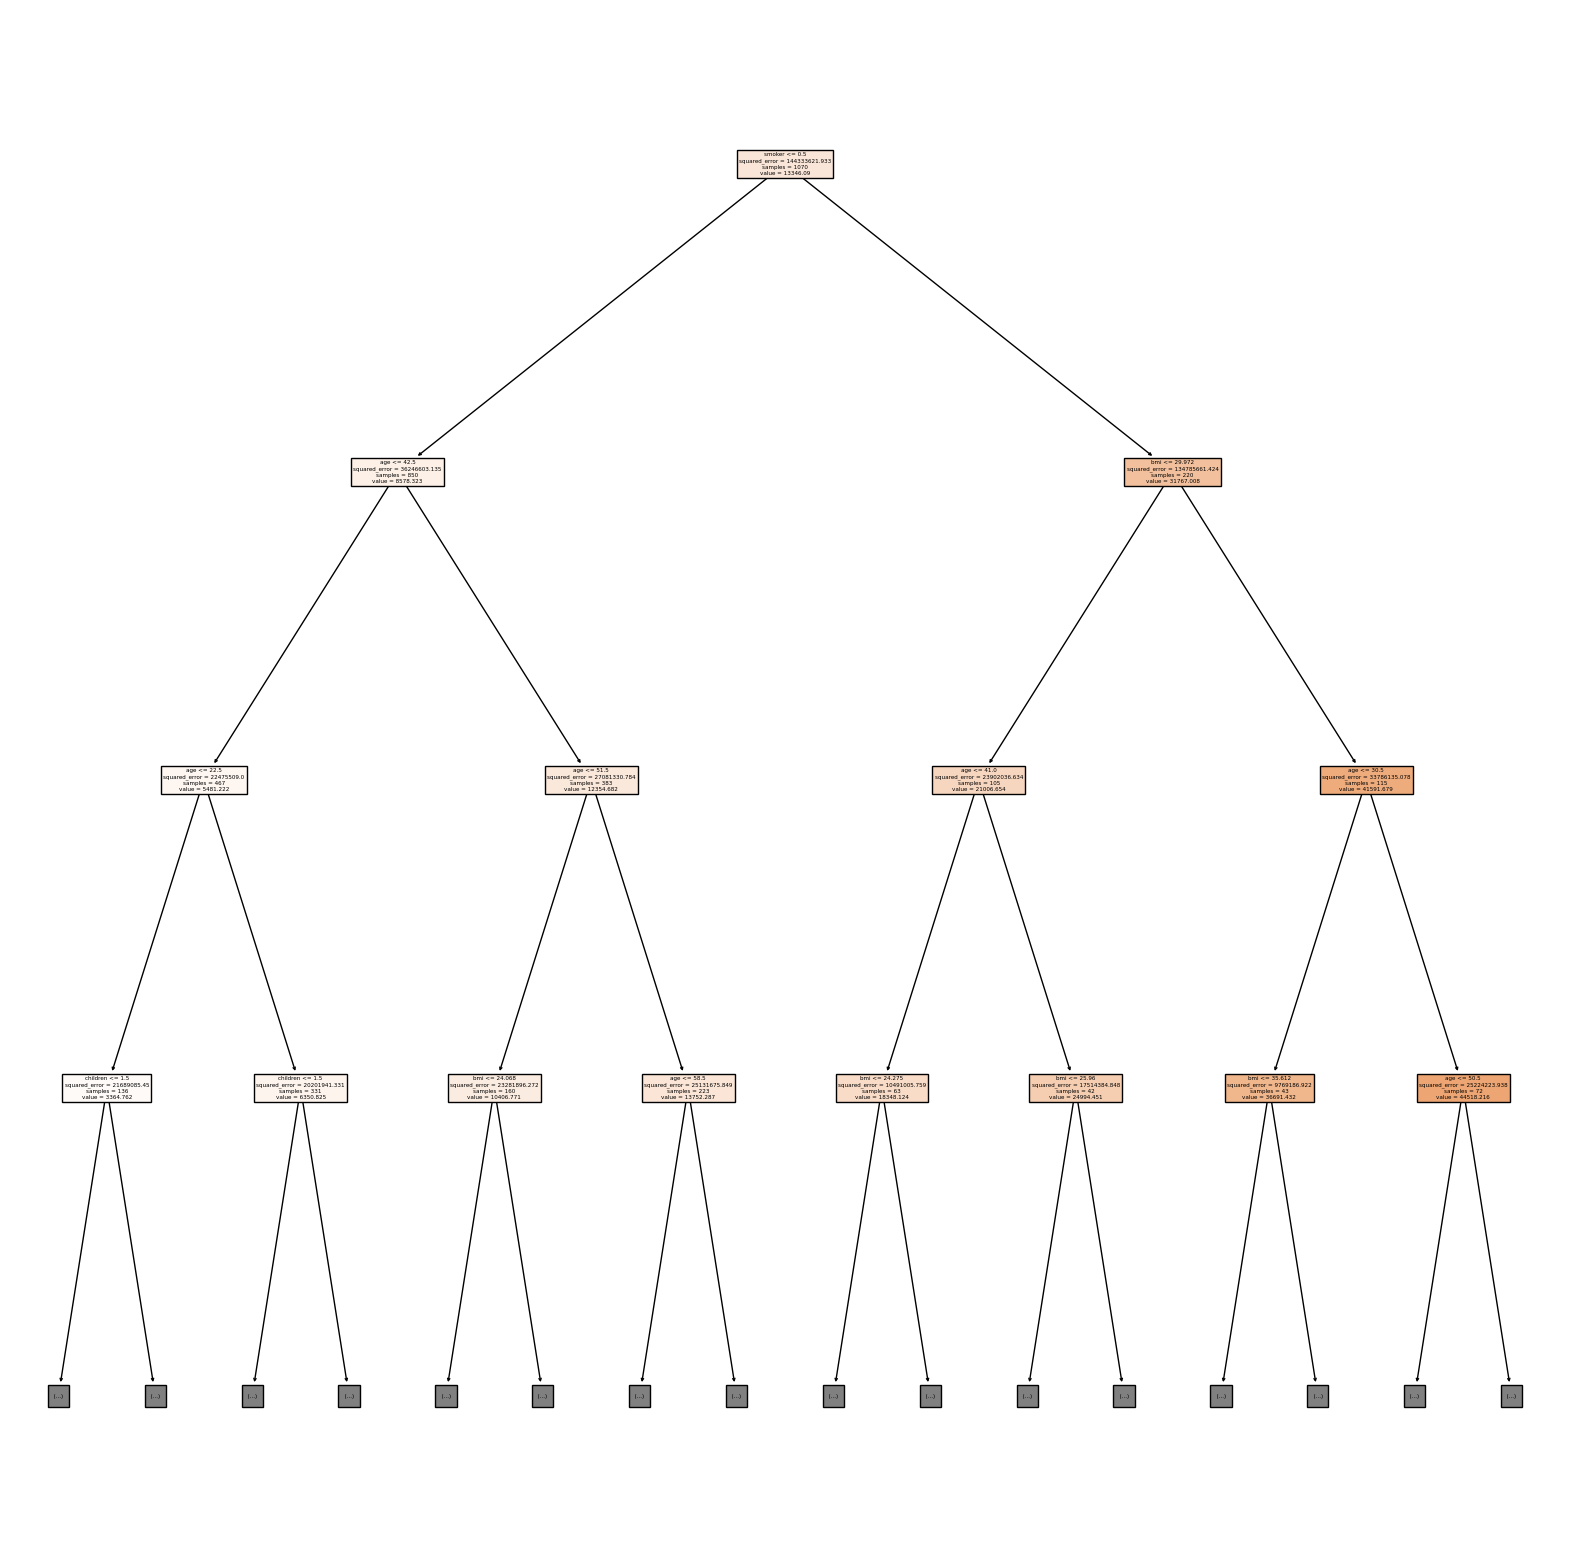

In [ ]:
#displaying decision tree
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(20,20))
tree.plot_tree(model_d, max_depth= 3, feature_names=x.columns, filled=True)
plt.show()


In [ ]:
#applying Random Forest regressor
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

y_pred_rf = model_rf.predict(x_test)

print("R2  for Random Forest Regression:", r2_score(y_test, y_pred_rf))
print("MAE for Random Forest Regression:", mean_absolute_error(y_test, y_pred_rf))


R2  for Random Forest Regression: 0.8642606273649586
MAE for Random Forest Regression: 2533.674643617756


In [ ]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)
model_xgb.fit(x_train, y_train)

y_pred_xgb = model_xgb.predict(x_test)

print("R2 score for XGBoost Regression:", r2_score(y_test, y_pred_xgb))
print("MAE for XGBoost Regression:", mean_absolute_error(y_test, y_pred_xgb))


R2 score for XGBoost Regression: 0.8501678977480663
MAE for XGBoost Regression: 2791.8325179517183
